In [1]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

In [2]:
M = [[1, 2, 3, 4], [2, 2, 3, 4], [3, 9, 8, 4], [4, 5, 6, 7]]

In [3]:
starting_point_x, starting_point_y = 3, 3
max_path = []
max_path_sum = 0

In [4]:
def Snake(M, x, y, path, path_sum):
    global max_path
    global max_path_sum

    print('X: ' + str(x), 'Y: ' + str(y)) 
    print('M:', M)
    print("Value:", M[x][y])
    print("Path:", max_path)
    print("Path Sum:", max_path_sum)
    print('\n')

    max_path = max_path + [M[x][y]]
    max_path_sum = max_path_sum + M[x][y]

    if x > 0 and y > 0:
        if M[x-1][y] > M[x][y-1]:
            new_path = path + [M[x-1][y]]
            new_sum = M[x-1][y] + path_sum

            M = M[:][:x]

            Snake(M, x-1, y, new_path, new_sum)
        else:
            new_path = path + [M[x-1][y]]
            new_sum = M[x-1][y] + path_sum

            for i in M: del i[-1] 

            Snake(M, x, y-1, new_path, new_sum)
    elif x > 0:
        new_path = path + [M[x-1][y]]
        new_sum = M[x-1][y] + path_sum

        M = M[:][:x]

        Snake(M, x-1, y, new_path, new_sum)
    elif y > 0:
        new_path = path + [M[x-1][y]]
        new_sum = M[x-1][y] + path_sum

        for i in M: del i[-1] 

        Snake(M, x, y-1, new_path, new_sum)
        

In [5]:
M = [[1, 2, 3, 4], [2, 2, 3, 4], [3, 9, 8, 4], [4, 5, 6, 7]]

In [6]:
Snake(M, starting_point_x, starting_point_y, [], 7)

X: 3 Y: 3
M: [[1, 2, 3, 4], [2, 2, 3, 4], [3, 9, 8, 4], [4, 5, 6, 7]]
Value: 7
Path: []
Path Sum: 0


X: 3 Y: 2
M: [[1, 2, 3], [2, 2, 3], [3, 9, 8], [4, 5, 6]]
Value: 6
Path: [7]
Path Sum: 7


X: 2 Y: 2
M: [[1, 2, 3], [2, 2, 3], [3, 9, 8]]
Value: 8
Path: [7, 6]
Path Sum: 13


X: 2 Y: 1
M: [[1, 2], [2, 2], [3, 9]]
Value: 9
Path: [7, 6, 8]
Path Sum: 21


X: 2 Y: 0
M: [[1], [2], [3]]
Value: 3
Path: [7, 6, 8, 9]
Path Sum: 30


X: 1 Y: 0
M: [[1], [2]]
Value: 2
Path: [7, 6, 8, 9, 3]
Path Sum: 33


X: 0 Y: 0
M: [[1]]
Value: 1
Path: [7, 6, 8, 9, 3, 2]
Path Sum: 35




In [7]:
max_path

[7, 6, 8, 9, 3, 2, 1]

In [8]:
max_path_sum

36

In [9]:
def Snake2(M, x, y, path, path_sum):
    global max_path
    global max_path_sum

    max_path = max_path + [M[x][y]]
    max_path_sum = max_path_sum + M[x][y]
    
    if x > 0 and y > 0:
        if M[x-1][y] > M[x][y-1]:
            new_path = path + [M[x-1][y]]
            new_sum = M[x-1][y] + path_sum

            M = M[:][:x]

            Snake2(M, x-1, y, new_path, new_sum)
        else:
            new_path = path + [M[x-1][y]]
            new_sum = M[x-1][y] + path_sum

            for i in M: np.delete(i,-1) 

            Snake2(M, x, y-1, new_path, new_sum)
    elif x > 0:
        new_path = path + [M[x-1][y]]
        new_sum = M[x-1][y] + path_sum

        M = M[:][:x]

        Snake2(M, x-1, y, new_path, new_sum)
    elif y > 0:
        new_path = path + [M[x-1][y]]
        new_sum = M[x-1][y] + path_sum

        for i in M: np.delete(i,-1)

        Snake2(M, x, y-1, new_path, new_sum)
        

In [10]:
numbs = [4, 16, 64, 256, 1024]

max_path2 = []
max_path_sum2 = []

experiment_time = []
experiment_sum = []

for j in range(5):

    time_arr = []
    for i in numbs:

        max_path = []
        max_path_sum = 0

        print('----------------------------------ITERATION FOR {0}.{1} NUMBERS-------------------------------------'.format(j, i))

        start = timeit.default_timer()

        arr = np.random.uniform(low=0.5, high=10, size=(i, i))

        Snake2(arr, i-1, i-1, [], arr[i-1][i-1])

        max_path2.append(max_path)
        max_path_sum2.append(max_path_sum)

        stop = timeit.default_timer()
        
        time_arr.append(stop - start)

    experiment_time.append(time_arr)
    experiment_sum.append(max_path_sum)


----------------------------------ITERATION FOR 0.4 NUMBERS-------------------------------------
----------------------------------ITERATION FOR 0.16 NUMBERS-------------------------------------
----------------------------------ITERATION FOR 0.64 NUMBERS-------------------------------------
----------------------------------ITERATION FOR 0.256 NUMBERS-------------------------------------
----------------------------------ITERATION FOR 0.1024 NUMBERS-------------------------------------
----------------------------------ITERATION FOR 1.4 NUMBERS-------------------------------------
----------------------------------ITERATION FOR 1.16 NUMBERS-------------------------------------
----------------------------------ITERATION FOR 1.64 NUMBERS-------------------------------------
----------------------------------ITERATION FOR 1.256 NUMBERS-------------------------------------
----------------------------------ITERATION FOR 1.1024 NUMBERS-------------------------------------
----------------

In [11]:
experiment_time

[[0.0016243000000031316,
  0.005948399999397225,
  0.030826600000182225,
  0.48231829999986076,
  7.70987150000019],
 [0.001969699999790464,
  0.0026778000001286273,
  0.02646149999964109,
  0.49045269999987795,
  7.983835800000634],
 [0.0018532000003688154,
  0.0016041999997469247,
  0.02813460000015766,
  0.5378463999995802,
  8.949403599999641],
 [0.0013957000001028064,
  0.0014675000002171146,
  0.02808640000057494,
  0.5292398999999932,
  8.66342480000003],
 [0.0014830000000074506,
  0.002090699999826029,
  0.03426969999964058,
  0.5440997000005154,
  8.221303300000727]]

In [12]:
experiment_sum

[14011.23824319055,
 13979.59410116527,
 13910.88791181745,
 13855.134292487619,
 13882.925181961069]

In [13]:
# Calculation of average value of times

avg_arr = []
for i in range(5):
    avg_arr.append((experiment_time[1][i] + experiment_time[2][i] +
                    experiment_time[3][i] + experiment_time[4][i]) / 4)

In [14]:
avg_arr

[0.001675400000067384,
 0.001960049999979674,
 0.029238050000003568,
 0.5254096749999917,
 8.454491875000258]

In [15]:
# Table

print("-----------------------------------------------------------------")
print(" n   | 4        | 16        | 64        | 256       | 1024      |")
print("-----------------------------------------------------------------")
for j in range(5):
    print("\nTime " + str(j + 1) + "|", end="")
    for i in range(5):
        print(" {:.2e}".format(experiment_time[j][i]), end="  |")

print("\n----------------------------------------------------------------")

-----------------------------------------------------------------
 n   | 4        | 16        | 64        | 256       | 1024      |
-----------------------------------------------------------------

Time 1| 1.62e-03  | 5.95e-03  | 3.08e-02  | 4.82e-01  | 7.71e+00  |
Time 2| 1.97e-03  | 2.68e-03  | 2.65e-02  | 4.90e-01  | 7.98e+00  |
Time 3| 1.85e-03  | 1.60e-03  | 2.81e-02  | 5.38e-01  | 8.95e+00  |
Time 4| 1.40e-03  | 1.47e-03  | 2.81e-02  | 5.29e-01  | 8.66e+00  |
Time 5| 1.48e-03  | 2.09e-03  | 3.43e-02  | 5.44e-01  | 8.22e+00  |
----------------------------------------------------------------


In [16]:
# Table of avg

print("Time averages")
print("\nTime |", end="")
for i in range(5):
    print(" {:.2e}".format(avg_arr[i]), end="  |")

Time averages

Time | 1.68e-03  | 1.96e-03  | 2.92e-02  | 5.25e-01  | 8.45e+00  |

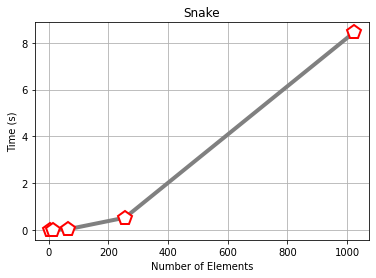

In [18]:
# Plot

fig, ax = plt.subplots()
ax.plot(numbs, avg_arr, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='red',
         markeredgewidth=2)

ax.set(xlabel='Number of Elements', ylabel='Time (s)',
       title='Snake')
ax.grid()
plt.show()